### Wine Color

### Members:
- Zander Holoboff (95785903)
- Shuyu Li(58785809)
- Kabir Sodhi(43245943)
- Cheryl Ang (28952851)


Our Dataset:
https://archive.ics.uci.edu/dataset/186/wine+quality



# Can we accurately predict the color of Vinho Verde wine based on selected physiochemical variables? 
##### Introduction with the preliminary exploratory data analysis:
Understanding the factors that influence the color of Vinho Verde wine is essential for enhancing the quality control and production processes in the wine industry. In this study, we aim to investigate whether it is feasible to predict the color of Vinho Verde wine using specific physicochemical variables. Analyzing these relationships can provide valuable insights for winemakers to optimize production techniques and maintain consistent product quality.

We will be utilizing [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) datasets, containing information on physicochemical properties and color attributes of Vinho Verde wines. 

- The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
- The dataset has the following variables: fixed acidity (concentration of non-volatile acids in the wine
), volatile acidity (concentration of volatile acids), citric acid concentration ($g/dm^3$ ), residual sugar content  (g/dm³), chloride content (g/dm³), free sulfur dioxide (mg/dm³), total sulfur dioxide (mg/dm³), density ($g/cm^3$),  pH, sulfate content ($g/dm^3$), alcohol content (vol %), quality (scale from 1-5 representing excellence).

##### Question:
Can we accurately predict the color of Vinho Verde wine (either red or white) based on selected physiochemical variables that are added to alter the sensory and antioxidant properties of the wine?




<font color="blue"> 
<h3>Note to the grader about some project proposal comments:</h3>

- Not loading all libraries at the top of the notebook: We loaded them in separate code blocks because when all of them were loaded at the same time, some of them had packages with with functions that conflicted each other.
- Not creating a testing set: A testing set was created in box 4.
- Not printing out the df at least once: The textbook has previously said that we could use the glimpse function when the dataframe is large so we thought it would be better that way.

</font> 

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(dplyr)
library(tidyclust)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
red_wine<-read_delim(file="data/winequality-red.csv",delim=";")|>
        rename(fixed_acidity = `fixed acidity`,
               volatile_acidity = `volatile acidity`,
               citric_acid = `citric acid`,
               residual_sugar = `residual sugar`,
               free_SO2 = `free sulfur dioxide`,
               total_SO2 = `total sulfur dioxide`
                )
# glimpse(red_wine)
white_wine<-read_delim(file="data/winequality-white.csv",delim=";")|>
        rename(fixed_acidity = `fixed acidity`,
               volatile_acidity = `volatile acidity`,
               citric_acid = `citric acid`,
               residual_sugar = `residual sugar`,
               free_SO2 = `free sulfur dioxide`,
               total_SO2 = `total sulfur dioxide`
                )
# glimpse(white_wine)

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
red_wine$color<- "red" # adds  category with $
white_wine$color <- "white" # adds category with $
combined_wine<-bind_rows(red_wine,white_wine)
write_csv2(combined_wine,"combined_wine.csv")

combined_wine2<-combined_wine|>
                select(free_SO2, chlorides, residual_sugar,citric_acid,color)

#glimpse(combined_wine2)

In [4]:
library(rsample)
set.seed(2024)
wine_split<-initial_split(data=combined_wine2, prop=0.75, strata=color)
wine_train<-training(wine_split)
glimpse(wine_train)
summary(wine_train)
wine_test <- testing(wine_split)
glimpse(wine_test)
summary(wine_test)

Rows: 4,872
Columns: 5
$ free_SO2       <dbl> 11, 25, 15, 17, 11, 13, 15, 15, 9, 17, 16, 9, 51, 6, 17…
$ chlorides      <dbl> 0.076, 0.098, 0.092, 0.075, 0.076, 0.075, 0.069, 0.065,…
$ residual_sugar <dbl> 1.9, 2.6, 2.3, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 6.1, 1.6, …
$ citric_acid    <dbl> 0.00, 0.00, 0.04, 0.56, 0.00, 0.00, 0.06, 0.00, 0.02, 0…
$ color          <chr> "red", "red", "red", "red", "red", "red", "red", "red",…


    free_SO2        chlorides       residual_sugar    citric_acid    
 Min.   :  1.00   Min.   :0.00900   Min.   : 0.600   Min.   :0.0000  
 1st Qu.: 17.00   1st Qu.:0.03800   1st Qu.: 1.800   1st Qu.:0.2500  
 Median : 29.00   Median :0.04700   Median : 3.000   Median :0.3100  
 Mean   : 30.51   Mean   :0.05617   Mean   : 5.395   Mean   :0.3186  
 3rd Qu.: 41.00   3rd Qu.:0.06500   3rd Qu.: 8.000   3rd Qu.:0.4000  
 Max.   :289.00   Max.   :0.61100   Max.   :65.800   Max.   :1.2300  
    color          
 Length:4872       
 Class :character  
 Mode  :character  
                   
                   
                   

Rows: 1,625
Columns: 5
$ free_SO2       <dbl> 15, 17, 52, 35, 16, 10, 11, 7, 12, 9, 5, 12, 8, 6, 20, …
$ chlorides      <dbl> 0.097, 0.071, 0.176, 0.092, 0.368, 0.106, 0.080, 0.172,…
$ residual_sugar <dbl> 1.8, 6.1, 3.8, 1.8, 1.7, 1.6, 1.4, 1.5, 5.9, 2.2, 1.8, …
$ citric_acid    <dbl> 0.08, 0.36, 0.18, 0.56, 0.28, 0.21, 0.16, 0.09, 0.36, 0…
$ color          <chr> "red", "red", "red", "red", "red", "red", "red", "red",…


    free_SO2        chlorides       residual_sugar    citric_acid    
 Min.   :  1.00   Min.   :0.01200   Min.   : 0.700   Min.   :0.0000  
 1st Qu.: 17.00   1st Qu.:0.03700   1st Qu.: 1.800   1st Qu.:0.2400  
 Median : 29.00   Median :0.04700   Median : 3.200   Median :0.3100  
 Mean   : 30.57   Mean   :0.05563   Mean   : 5.589   Mean   :0.3186  
 3rd Qu.: 41.00   3rd Qu.:0.06500   3rd Qu.: 8.600   3rd Qu.:0.3900  
 Max.   :138.50   Max.   :0.46400   Max.   :31.600   Max.   :1.6600  
    color          
 Length:1625       
 Class :character  
 Mode  :character  
                   
                   
                   

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.8
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard()           masks purrr::discard()
✖ dplyr::filter()             masks stats::filter()
✖ recipes::fixed()            masks stringr::fixed()
✖ parsnip::knit_engine_docs() masks tidyclust::knit_engine_docs()
✖ dplyr::lag()                masks stats::lag()
✖ parsnip::list_md_problems() masks tidyclust::list_md_problems()
✖ yardstick::spec()           masks readr::spec()
✖ recipes::step()             masks stats::step()
• Dig deeper into tidy modeling with R at https://www.tmwr.org



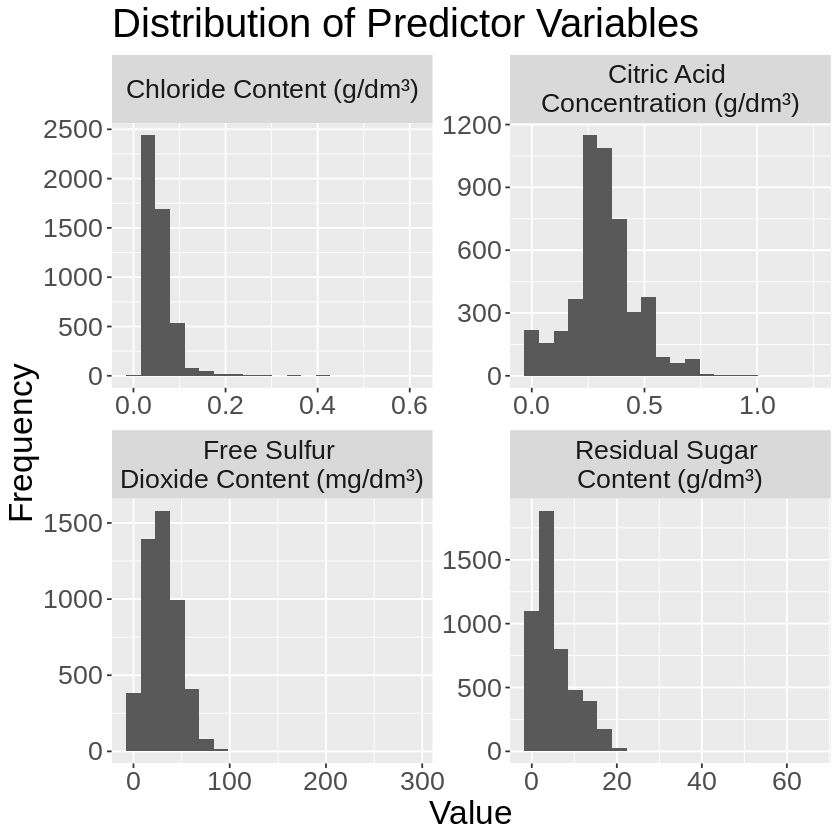

In [5]:
library(tidymodels)
library(ggplot2)

train_data_long<-wine_train|>
                pivot_longer(cols=free_SO2:citric_acid, names_to = "variable",values_to = "value")

variable_labels<-c(free_SO2 ="Free Sulfur \nDioxide Content (mg/dm³)",
                  chlorides = "Chloride Content (g/dm³)",
                  residual_sugar = "Residual Sugar \nContent (g/dm³)",
                   citric_acid = "Citric Acid \nConcentration (g/dm³)")
                    
                   
plot1<-train_data_long|> ggplot(aes(x = value)) +
                                geom_histogram(bins=20)+
                                facet_wrap(~ variable, scale="free", labeller = labeller(variable = variable_labels))+
                                labs(x="Value", y="Frequency",)+
                                ggtitle("Distribution of Predictor Variables")+
                                theme(text=element_text(size=20))
                                
plot1

In [6]:
library(rsample)
library(tidymodels)
set.seed(2024)
wine_recipe <- recipe(color ~ free_SO2 + chlorides + residual_sugar + citric_acid, data = wine_train) |>
               step_scale(all_predictors()) |>
               step_center(all_predictors())
               
#wine_recipe

In [ ]:
set.seed(2024) 

vfold <- vfold_cv(wine_train, v = 5, strata = color)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1,to = 100,by = 5))

knn_results <- workflow() |>
    add_recipe(wine_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = vfold, grid = k_vals) |>
    collect_metrics()

accuracies <- knn_results |> 
       filter(.metric == "accuracy")
accuracies

In [ ]:
options(repr.plot.height = 5, repr.plot.width = 6)

cross_val_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Cross-validation Accuracy vs Number of Neighbors")
cross_val_plot

best_k <- accuracies |>
    arrange(desc(mean)) |>
    head(1) |>
    pull(neighbors)
best_k

In [ ]:
knn_spec_2<- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |>
    set_engine("kknn") |>
    set_mode("classification")

wine_fit_2 <- workflow() |>
    add_recipe(wine_recipe) |>
    add_model(knn_spec_2) |>
    fit(data = wine_train)
           
wine_fit_2

In [ ]:
wine_test_predictions <- predict(wine_fit_2, wine_test) |>
    bind_cols(wine_test)
                         
wine_test_predictions

# how many incorrect predictions
inc_number <- filter(wine_test_predictions, .pred_class != color) |>
    ggplot(aes(x = color)) +
    geom_bar() +
    labs(x = "color", title = "Number of incorrect predictions per wine color")
inc_number

Below we test our classifier prediction on a red and white wine from the test data set; data that hasn't been seen by the classifier yet. Thus, this will show us if our classifier has some accuracy.

In [ ]:
# 2 red and white wines from test data
slice(wine_test, 1, 420)

# remove the color column to test
new_observation <- slice(wine_test, 1, 420) |>
    select(free_SO2:citric_acid)
new_observation

prediction <- predict(wine_fit_2, new_observation)
prediction

Finally, using the metrics from our tuning workflow, our accuracy is roughly a 96% chance of guessing the correct wine color.


In [ ]:
# our percent accuracy of guessing the correct wine color
wine_accuracy <- accuracies |>
    filter(neighbors == best_k) |>
    select(mean) |>
    pull(mean)
wine_accuracy

# Method

##### We have chosen the predictors to be free sulfur dioxide ($SO^2$) content (mg/dm³), chloride content (g/dm³), residual sugar content(g/dm³), and citric acid content (g/dm³).
Free $SO^2$ content shows the active fraction of the compound that reacts with oxygen and other chemicals in the wine. The other three are selected because they influence the sensory properties of the wine. Moving on to analyzing the data, a predictive model will be built to predict the color of Vinho Verde wines based on the predictors selected above. We will first also look at the relationships between the predictors based on their distribution. Then, for the classification task, we will divide the combined dataset into a training set, which will be used to train the classifier, and a testing set that will be used to evaluate the classifier.  We can use histograms with facet wraps to visualize the distribution of each predictor variable grouped by wine color (red or white) so that their distributions can be compared.


# Expected outcomes and significance

##### Expected outcomes:
- We expect to find significant differences between the physicochemical variables of red and white wines, which in turn will accurately predict the color of the wine.

##### Significance:
- By accurately predicting the color of Vino Verde wines based on physicochemical variables, winemakers can use these predictions to optimize their production processes and better guarantee the consistency of the color of their wines.
- At the same time, for the consumer, a clearer and richer labeling of the color of the wine purchased can increase the level of satisfaction with the purchase.

##### Future questions:
- Whether there are variables that have the greatest impact on predicting wine color?
- How the physicochemical and sensory variables of Vinho Verde wines are affected by different winemaking techniques and grape varieties, as well as by environmental factors?
- Whether similar models can be flexibly applied to other types of wines besides Vinho Verde wines for color prediction?




### Reference

Cortez, Paulo, Cerdeira, A., Almeida, F., Matos, T., and Reis, J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.